In [203]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
# import sklearn

import os

In [204]:
demand_total = pd.read_csv('data/demand_total.csv', index_col='datetime_utc')
demand_total.index = pd.to_datetime(demand_total.index)
demand_total.head()

,value,datetime,tz_time,geo_id,geo_name
datetime_utc,,,,,
2021-12-31 23:00:00+00:00,20955.3,2022-01-01T00:00:00.000+01:00,2021-12-31T23:00:00.000Z,8741,Península
2022-01-01 00:00:00+00:00,20165.8,2022-01-01T01:00:00.000+01:00,2022-01-01T00:00:00.000Z,8741,Península
2022-01-01 01:00:00+00:00,18812.4,2022-01-01T02:00:00.000+01:00,2022-01-01T01:00:00.000Z,8741,Península
2022-01-01 02:00:00+00:00,17646.4,2022-01-01T03:00:00.000+01:00,2022-01-01T02:00:00.000Z,8741,Península
2022-01-01 03:00:00+00:00,17018.1,2022-01-01T04:00:00.000+01:00,2022-01-01T03:00:00.000Z,8741,Península


In [205]:
root = 'data'

df_dict = {}

for fn in os.listdir(root):
    name = os.path.splitext(fn)[0]
    df_dict[name] = pd.read_csv(os.path.join(root, fn), index_col='datetime_utc')
    df_dict[name].index = pd.to_datetime(df_dict[name].index)
    if(name in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']):
        df_dict[name].columns = df_dict[name].columns + '_' + name

df_dict['demand_total']

,value_demand_total,datetime_demand_total,tz_time_demand_total,geo_id_demand_total,geo_name_demand_total
datetime_utc,,,,,
2021-12-31 23:00:00+00:00,20955.3,2022-01-01T00:00:00.000+01:00,2021-12-31T23:00:00.000Z,8741,Península
2022-01-01 00:00:00+00:00,20165.8,2022-01-01T01:00:00.000+01:00,2022-01-01T00:00:00.000Z,8741,Península
2022-01-01 01:00:00+00:00,18812.4,2022-01-01T02:00:00.000+01:00,2022-01-01T01:00:00.000Z,8741,Península
2022-01-01 02:00:00+00:00,17646.4,2022-01-01T03:00:00.000+01:00,2022-01-01T02:00:00.000Z,8741,Península
2022-01-01 03:00:00+00:00,17018.1,2022-01-01T04:00:00.000+01:00,2022-01-01T03:00:00.000Z,8741,Península
...,...,...,...,...,...
2023-08-30 18:00:00+00:00,27748.0,2023-08-30T20:00:00.000+02:00,2023-08-30T18:00:00.000Z,8741,Península
2023-08-30 19:00:00+00:00,28143.0,2023-08-30T21:00:00.000+02:00,2023-08-30T19:00:00.000Z,8741,Península
2023-08-30 20:00:00+00:00,26787.3,2023-08-30T22:00:00.000+02:00,2023-08-30T20:00:00.000Z,8741,Península


In [206]:
for value in df_dict:
    if(value in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']):
        df_dict[value] = df_dict[value].drop(columns=list(df_dict[value].columns[1:]))
    else:
        df_dict[value] = df_dict[value].drop(columns=list(df_dict[value].columns[1:3]))

In [207]:
df_dict['demand_total'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2021-12-31 23:00:00+00:00 to 2023-08-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value_demand_total  14568 non-null  float64
dtypes: float64(1)
memory usage: 227.6 KB


In [208]:
pd.DatetimeIndex(df_dict['demand_total'].index)

DatetimeIndex(['2021-12-31 23:00:00+00:00', '2022-01-01 00:00:00+00:00',
               '2022-01-01 01:00:00+00:00', '2022-01-01 02:00:00+00:00',
               '2022-01-01 03:00:00+00:00', '2022-01-01 04:00:00+00:00',
               '2022-01-01 05:00:00+00:00', '2022-01-01 06:00:00+00:00',
               '2022-01-01 07:00:00+00:00', '2022-01-01 08:00:00+00:00',
               ...
               '2023-08-30 13:00:00+00:00', '2023-08-30 14:00:00+00:00',
               '2023-08-30 15:00:00+00:00', '2023-08-30 16:00:00+00:00',
               '2023-08-30 17:00:00+00:00', '2023-08-30 18:00:00+00:00',
               '2023-08-30 19:00:00+00:00', '2023-08-30 20:00:00+00:00',
               '2023-08-30 21:00:00+00:00', '2023-08-30 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime_utc', length=14568, freq=None)

In [209]:
df_dict['demand_total'].index.value_counts()

datetime_utc
2022-10-30 00:00:00+00:00    2
2021-12-31 23:00:00+00:00    1
2023-02-09 07:00:00+00:00    1
2023-02-09 09:00:00+00:00    1
2023-02-09 10:00:00+00:00    1
                            ..
2022-07-22 10:00:00+00:00    1
2022-07-22 11:00:00+00:00    1
2022-07-22 12:00:00+00:00    1
2022-07-22 13:00:00+00:00    1
2023-08-30 22:00:00+00:00    1
Name: count, Length: 14567, dtype: int64

In [210]:
df_dict['demand_total'].loc['2022-10-30 00:00:00+00:00']


,value_demand_total
datetime_utc,
2022-10-30 00:00:00+00:00,18327.3
2022-10-30 00:00:00+00:00,17581.2


In [211]:
df_dict['demand_total'] = df_dict['demand_total'][~df_dict['demand_total'].index.duplicated(keep='first')]

c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

<Axes: xlabel='month', ylabel='value_demand_total'>

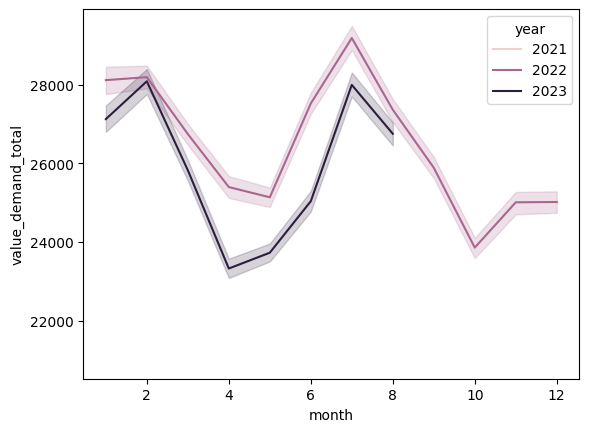

In [212]:
df_dict['demand_total']['month'] = pd.DatetimeIndex(df_dict['demand_total'].index).month
df_dict['demand_total']['year'] = pd.DatetimeIndex(df_dict['demand_total'].index).year

sns.lineplot(data = df_dict['demand_total'], x = 'month', y = 'value_demand_total', hue = 'year')

In [213]:
df_dict['demand_total'][df_dict['demand_total']['year'] == '2021']

,value_demand_total,month,year
datetime_utc,,,


In [214]:
df_dict['gen_total'].head()

,value_gen_total
datetime_utc,
2021-12-31 23:00:00+00:00,19553.3
2022-01-01 00:00:00+00:00,19307.5
2022-01-01 01:00:00+00:00,18964.5
2022-01-01 02:00:00+00:00,18545.9
2022-01-01 03:00:00+00:00,18385.3


In [215]:
df_dict['gen_total'].index.value_counts()

datetime_utc
2022-10-30 00:00:00+00:00    2
2021-12-31 23:00:00+00:00    1
2023-02-09 07:00:00+00:00    1
2023-02-09 09:00:00+00:00    1
2023-02-09 10:00:00+00:00    1
                            ..
2022-07-22 10:00:00+00:00    1
2022-07-22 11:00:00+00:00    1
2022-07-22 12:00:00+00:00    1
2022-07-22 13:00:00+00:00    1
2023-08-30 22:00:00+00:00    1
Name: count, Length: 14567, dtype: int64

In [216]:
df_dict['gen_total'] = df_dict['gen_total'][~df_dict['gen_total'].index.duplicated(keep='first')]

c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

<Axes: xlabel='month', ylabel='value_gen_total'>

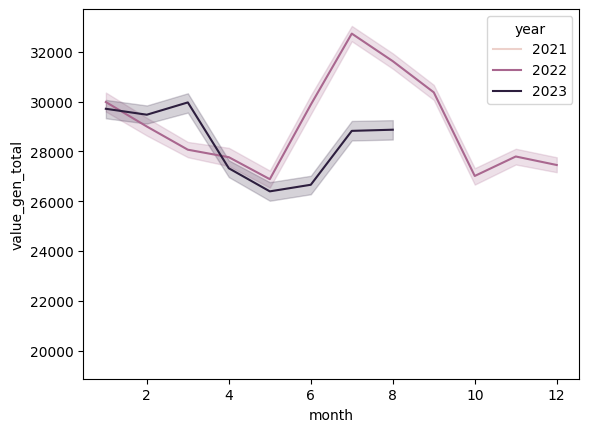

In [217]:
df_dict['gen_total']['month'] = pd.DatetimeIndex(df_dict['gen_total'].index).month
df_dict['gen_total']['year'] = pd.DatetimeIndex(df_dict['gen_total'].index).year

sns.lineplot(data = df_dict['gen_total'], x = 'month', y = 'value_gen_total', hue = 'year')

In [218]:
df = pd.DataFrame(columns=['datetime_utc'])
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
for value in ['demand_total','gen_solar_th','gen_ccgt','gen_coal']:
    df = pd.merge(df, df_dict[value], on='datetime_utc', how='outer', suffixes=['demand_total','gen_solar_th'])

df.head()

,datetime_utc,value_demand_total,month,year,value_gen_solar_th,value_gen_ccgt,value_gen_coal
0,2021-12-31 23:00:00+00:00,20955.3,12,2021,10.0,NaN,900.5
1,2022-01-01 00:00:00+00:00,20165.8,1,2022,10.0,NaN,852.5
2,2022-01-01 01:00:00+00:00,18812.4,1,2022,10.0,NaN,851.5
3,2022-01-01 02:00:00+00:00,17646.4,1,2022,10.0,NaN,851.5
4,2022-01-01 03:00:00+00:00,17018.1,1,2022,10.0,NaN,851.5


In [219]:
df_dict['spot_price_2022-01-01'].head()

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,1,Portugal
2021-12-31 23:00:00+00:00,89.06,2,Francia
2021-12-31 23:00:00+00:00,145.86,3,España
2021-12-31 23:00:00+00:00,138.19,8824,Reino Unido
2021-12-31 23:00:00+00:00,170.28,8825,Italia


In [220]:
df_dict['spot_price_2022-01-01'][df_dict['spot_price_2022-01-01']['geo_id'] == 3]

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2022-01-30 19:00:00+00:00,268.65,3,España
2022-01-30 20:00:00+00:00,266.01,3,España
2022-01-30 21:00:00+00:00,257.55,3,España


In [221]:
for value in df_dict:
    if value not in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']:
        df_dict[value] = df_dict[value][df_dict[value]['geo_id'] == 3]

df_dict['spot_price_2022-01-01'].head()

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España


In [222]:
df_dict['spot_price_2022-02-01']

,value,geo_id,geo_name
datetime_utc,,,
2022-01-31 23:00:00+00:00,208.40,3,España
2022-02-01 00:00:00+00:00,191.95,3,España
2022-02-01 01:00:00+00:00,191.65,3,España
2022-02-01 02:00:00+00:00,186.10,3,España
2022-02-01 03:00:00+00:00,169.97,3,España
...,...,...,...
2022-02-27 19:00:00+00:00,350.00,3,España
2022-02-27 20:00:00+00:00,350.00,3,España
2022-02-27 21:00:00+00:00,310.01,3,España


In [223]:
pd.concat([df_dict['spot_price_2022-01-01'], df_dict['spot_price_2022-02-01']])

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2022-02-27 19:00:00+00:00,350.00,3,España
2022-02-27 20:00:00+00:00,350.00,3,España
2022-02-27 21:00:00+00:00,310.01,3,España


In [224]:
spot_prices = [x for x in df_dict if x not in ['demand_total','gen_ccgt','gen_coal','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind']]
spot_prices

['spot_price_2022-01-01',
 'spot_price_2022-02-01',
 'spot_price_2022-03-01',
 'spot_price_2022-04-01',
 'spot_price_2022-05-01',
 'spot_price_2022-06-01',
 'spot_price_2022-07-01',
 'spot_price_2022-08-01',
 'spot_price_2022-09-01',
 'spot_price_2022-10-01',
 'spot_price_2022-11-01',
 'spot_price_2022-12-01',
 'spot_price_2023-01-01',
 'spot_price_2023-02-01',
 'spot_price_2023-03-01',
 'spot_price_2023-04-01',
 'spot_price_2023-05-01',
 'spot_price_2023-06-01',
 'spot_price_2023-07-01']

In [225]:
spot_prices_df = pd.DataFrame()
for value in spot_prices:
    spot_prices_df = pd.concat([spot_prices_df, df_dict[value]])

spot_prices_df = spot_prices_df.sort_index()
spot_prices_df

,value,geo_id,geo_name
datetime_utc,,,
2021-12-31 23:00:00+00:00,145.86,3,España
2022-01-01 00:00:00+00:00,114.90,3,España
2022-01-01 01:00:00+00:00,113.87,3,España
2022-01-01 02:00:00+00:00,97.80,3,España
2022-01-01 03:00:00+00:00,97.80,3,España
...,...,...,...
2023-07-30 18:00:00+00:00,98.48,3,España
2023-07-30 19:00:00+00:00,112.82,3,España
2023-07-30 20:00:00+00:00,113.93,3,España


In [226]:
df_dict['spot_prices_df'] = spot_prices_df

In [227]:
df_dict['demand_total'] = df_dict['demand_total'].drop(columns=['month','year'])
df_dict['gen_total'] = df_dict['gen_total'].drop(columns=['month','year'])

In [228]:
df = pd.DataFrame(columns=['datetime_utc'])
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
for value in ['demand_total','gen_ccgt','gen_coal','gen_hydro','gen_nuclear','gen_solar_pv','gen_solar_th','gen_total','gen_wind','spot_prices_df']:
    df = pd.merge(df, df_dict[value], on='datetime_utc', how='outer')

df.head()

,datetime_utc,value_demand_total,value_gen_ccgt,value_gen_coal,value_gen_hydro,value_gen_nuclear,value_gen_solar_pv,value_gen_solar_th,value_gen_total,value_gen_wind,value,geo_id,geo_name
0,2021-12-31 23:00:00+00:00,20955.3,NaN,900.5,2418.5,6087.5,77.3,10.0,19553.3,7061.7,145.86,3.0,España
1,2022-01-01 00:00:00+00:00,20165.8,NaN,852.5,2289.4,6089.4,5.2,10.0,19307.5,7075.1,114.90,3.0,España
2,2022-01-01 01:00:00+00:00,18812.4,NaN,851.5,2008.4,6088.5,5.2,10.0,18964.5,7038.7,113.87,3.0,España
3,2022-01-01 02:00:00+00:00,17646.4,NaN,851.5,1742.1,6087.5,5.2,10.0,18545.9,6959.8,97.80,3.0,España
4,2022-01-01 03:00:00+00:00,17018.1,NaN,851.5,1734.1,6088.5,5.2,10.0,18385.3,6794.9,97.80,3.0,España


In [229]:
df = df.drop(columns=['geo_id','geo_name'])

In [230]:
print('correlation of different energy sources to price:')
df.corr()['value'].sort_values()

correlation of different energy sources to price:


datetime_utc         -0.676630
value_gen_solar_pv   -0.275942
value_gen_solar_th   -0.268863
value_gen_wind       -0.229660
value_gen_total      -0.018269
value_gen_hydro       0.078667
value_gen_nuclear     0.111854
value_gen_ccgt        0.191121
value_gen_coal        0.217308
value_demand_total    0.227541
value                 1.000000
Name: value, dtype: float64

In [231]:
print('solar and wind are negatively correlated with price so more of that reduces price. Ccgt and coal are positively correlated with \
      price so more of that increases price')

solar and wind are negatively correlated with price so more of that reduces price. Ccgt and coal are positively correlated with       price so more of that increases price


<Axes: >

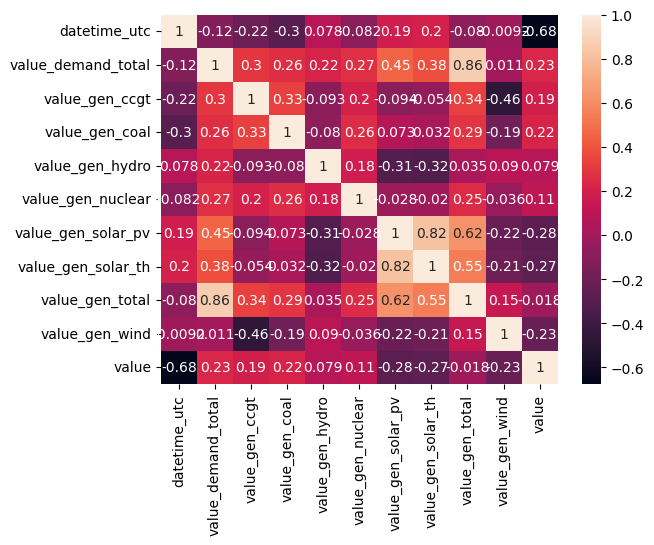

In [232]:
sns.heatmap(df.corr(), annot=True)

In [233]:
df['month'] = df['datetime_utc'].dt.month
df['year'] = df['datetime_utc'].dt.year
df['day_of_week'] = df['datetime_utc'].dt.day_of_week

In [234]:
df.head()

,datetime_utc,value_demand_total,value_gen_ccgt,value_gen_coal,value_gen_hydro,value_gen_nuclear,value_gen_solar_pv,value_gen_solar_th,value_gen_total,value_gen_wind,value,month,year,day_of_week
0,2021-12-31 23:00:00+00:00,20955.3,NaN,900.5,2418.5,6087.5,77.3,10.0,19553.3,7061.7,145.86,12,2021,4
1,2022-01-01 00:00:00+00:00,20165.8,NaN,852.5,2289.4,6089.4,5.2,10.0,19307.5,7075.1,114.90,1,2022,5
2,2022-01-01 01:00:00+00:00,18812.4,NaN,851.5,2008.4,6088.5,5.2,10.0,18964.5,7038.7,113.87,1,2022,5
3,2022-01-01 02:00:00+00:00,17646.4,NaN,851.5,1742.1,6087.5,5.2,10.0,18545.9,6959.8,97.80,1,2022,5
4,2022-01-01 03:00:00+00:00,17018.1,NaN,851.5,1734.1,6088.5,5.2,10.0,18385.3,6794.9,97.80,1,2022,5


<Axes: xlabel='month'>

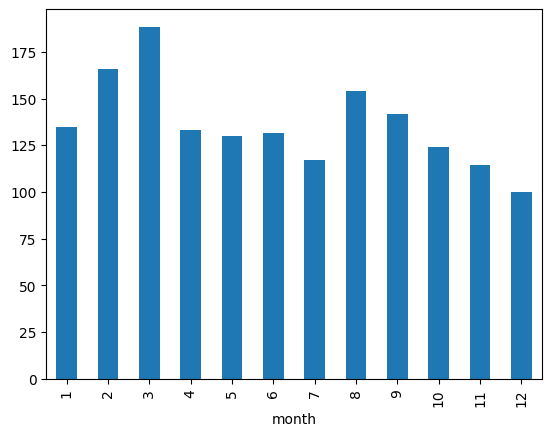

In [235]:
df.groupby('month').mean()['value'].plot(kind='bar')

<Axes: xlabel='year'>

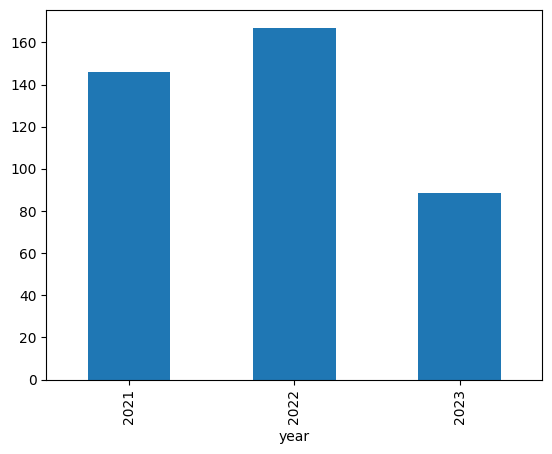

In [236]:
df.groupby('year').mean()['value'].plot(kind='bar')

<Axes: xlabel='day_of_week'>

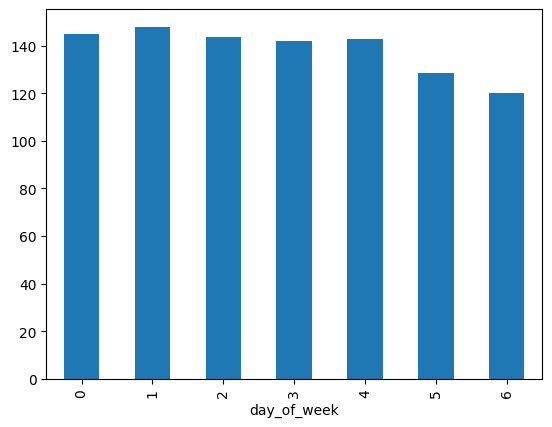

In [237]:
df.groupby('day_of_week').mean()['value'].plot(kind='bar')

In [238]:
df['hour'] = df['datetime_utc'].dt.hour

<Axes: xlabel='hour'>

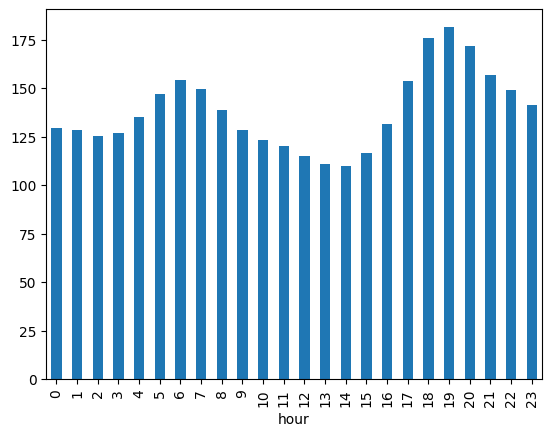

In [239]:
df.groupby('hour').mean()['value'].plot(kind='bar')

In [240]:
df = df.drop(columns=['month','year','day_of_week','hour'])

In [241]:
df.isna().sum()

datetime_utc             0
value_demand_total       0
value_gen_ccgt        2393
value_gen_coal        5988
value_gen_hydro          0
value_gen_nuclear        0
value_gen_solar_pv       0
value_gen_solar_th    1007
value_gen_total          0
value_gen_wind           0
value                 1158
dtype: int64

In [242]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
vars_with_na

['value_gen_ccgt', 'value_gen_coal', 'value_gen_solar_th', 'value']

In [243]:
for var in vars_with_na:
    df[var] = df[var].interpolate(method='nearest')

df[vars_with_na].isnull().sum()



value_gen_ccgt         24
value_gen_coal          0
value_gen_solar_th      0
value                 744
dtype: int64

In [244]:
for var in vars_with_na:
    df[var] = df[var].fillna(0)

df[vars_with_na].isnull().sum()

value_gen_ccgt        0
value_gen_coal        0
value_gen_solar_th    0
value                 0
dtype: int64

In [245]:
df['month'] = df['datetime_utc'].dt.month
df['year'] = df['datetime_utc'].dt.year
df['day_of_week'] = df['datetime_utc'].dt.day_of_week
df['hour'] = df['datetime_utc'].dt.hour



In [246]:
df['value_gen_ccgt_coal'] = df['value_gen_ccgt'] + df['value_gen_coal']
df['value_gen_wind_solar_pv_solar_th'] = df['value_gen_wind'] + df['value_gen_solar_pv'] + df['value_gen_solar_th']

In [247]:
df.corr()['value'].sort_values()

datetime_utc                       -0.727536
year                               -0.575020
value_gen_wind_solar_pv_solar_th   -0.378223
value_gen_solar_pv                 -0.276890
value_gen_solar_th                 -0.259063
month                              -0.243185
value_gen_wind                     -0.185220
day_of_week                        -0.104409
value_gen_total                    -0.013580
value_gen_nuclear                   0.053547
hour                                0.096706
value_gen_hydro                     0.114904
value_demand_total                  0.192914
value_gen_ccgt                      0.315925
value_gen_ccgt_coal                 0.354086
value_gen_coal                      0.523301
value                               1.000000
Name: value, dtype: float64

In [248]:

# Calculate rolling mean and standard deviation with a window size of 3
window_size = 3
df['rolling_mean'] = df['value'].rolling(window=window_size).mean()
df['rolling_std'] = df['value'].rolling(window=window_size).std()

df['rolling_mean'].head()


0           NaN
1           NaN
2    124.876667
3    108.856667
4    103.156667
Name: rolling_mean, dtype: float64

In [249]:
lag = 2
df['lagged_price'] = df['value'].shift(lag)

df['lagged_price'].head()


0       NaN
1       NaN
2    145.86
3    114.90
4    113.87
Name: lagged_price, dtype: float64

In [250]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
vars_with_na

['rolling_mean', 'rolling_std', 'lagged_price']

In [251]:
for var in vars_with_na:
    df[var] = df[var].interpolate(method='nearest')

df[vars_with_na].isnull().sum()

rolling_mean    2
rolling_std     2
lagged_price    2
dtype: int64

In [252]:
for var in vars_with_na:
    df[var] = df[var].fillna(0)

df[vars_with_na].isnull().sum()

rolling_mean    0
rolling_std     0
lagged_price    0
dtype: int64

In [253]:
df.head()

,datetime_utc,value_demand_total,value_gen_ccgt,value_gen_coal,value_gen_hydro,value_gen_nuclear,value_gen_solar_pv,value_gen_solar_th,value_gen_total,value_gen_wind,value,month,year,day_of_week,hour,value_gen_ccgt_coal,value_gen_wind_solar_pv_solar_th,rolling_mean,rolling_std,lagged_price
0,2021-12-31 23:00:00+00:00,20955.3,0.0,900.5,2418.5,6087.5,77.3,10.0,19553.3,7061.7,145.86,12,2021,4,23,900.5,7149.0,0.000000,0.000000,0.00
1,2022-01-01 00:00:00+00:00,20165.8,0.0,852.5,2289.4,6089.4,5.2,10.0,19307.5,7075.1,114.90,1,2022,5,0,852.5,7090.3,0.000000,0.000000,0.00
2,2022-01-01 01:00:00+00:00,18812.4,0.0,851.5,2008.4,6088.5,5.2,10.0,18964.5,7038.7,113.87,1,2022,5,1,851.5,7053.9,124.876667,18.179396,145.86
3,2022-01-01 02:00:00+00:00,17646.4,0.0,851.5,1742.1,6087.5,5.2,10.0,18545.9,6959.8,97.80,1,2022,5,2,851.5,6975.0,108.856667,9.589194,114.90
4,2022-01-01 03:00:00+00:00,17018.1,0.0,851.5,1734.1,6088.5,5.2,10.0,18385.3,6794.9,97.80,1,2022,5,3,851.5,6810.1,103.156667,9.278019,113.87


In [254]:
import matplotlib.pyplot as plt

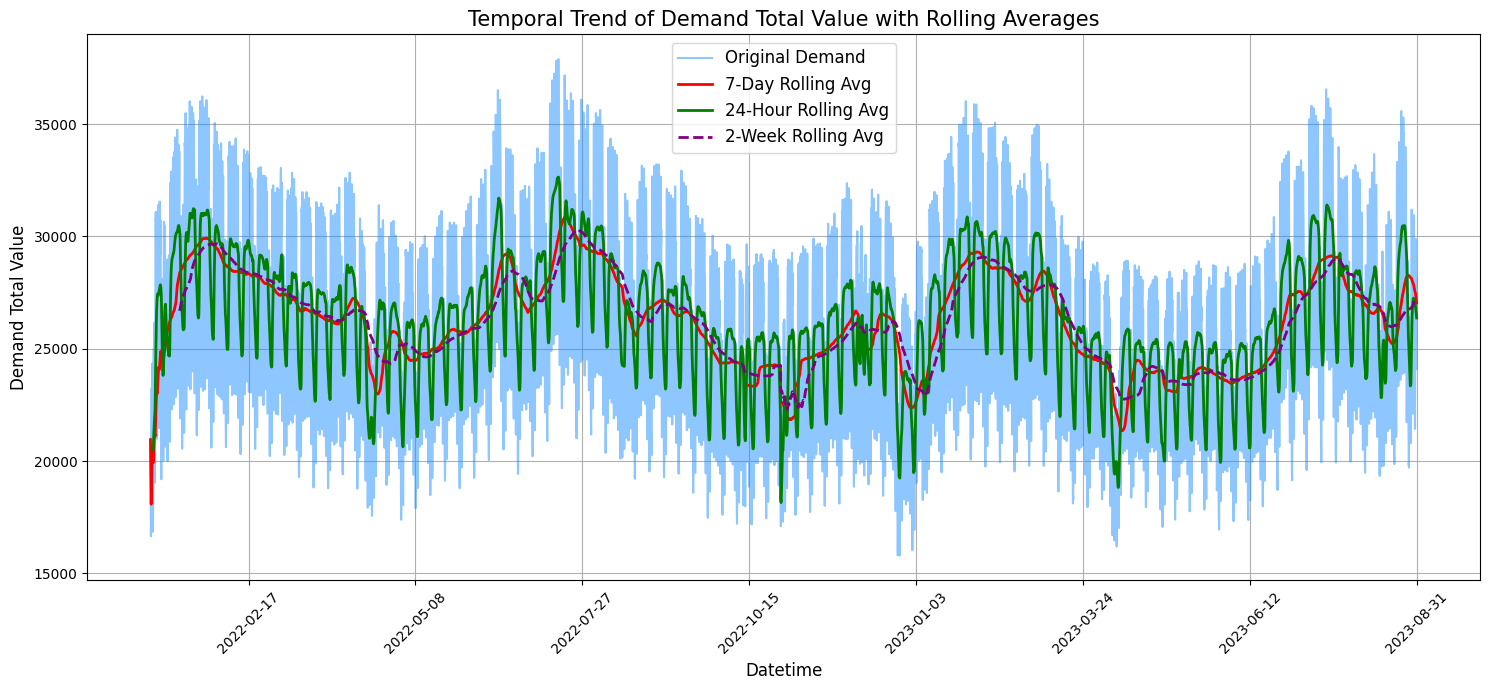

In [255]:
# Convert the datetime_utc column to a pandas datetime type and set as index, if not already done
if 'datetime_utc' in df.columns:
    df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
    df.set_index('datetime_utc', inplace=True)

# Create the rolling average columns
df['rolling_avg_7d'] = df['value_demand_total'].rolling(window='7D').mean()  # using time-based window for 7 days
df['rolling_avg_24h'] = df['value_demand_total'].rolling(window=24).mean()   # using integer-based window for 24 hours
df['rolling_avg_2weeks'] = df['value_demand_total'].rolling(window=336).mean() # using integer-based window for 2 weeks

# Plot the original data and the rolling averages
plt.figure(figsize=(15, 7))

plt.plot(df.index, df['value_demand_total'], label='Original Demand', color='dodgerblue', alpha=0.5)
plt.plot(df.index, df['rolling_avg_7d'], label='7-Day Rolling Avg', color='red', linewidth=2)
plt.plot(df.index, df['rolling_avg_24h'], label='24-Hour Rolling Avg', color='green', linewidth=2)
plt.plot(df.index, df['rolling_avg_2weeks'], label='2-Week Rolling Avg', color='purple', linewidth=2, linestyle='--')

plt.title('Temporal Trend of Demand Total Value with Rolling Averages', fontsize=15)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Demand Total Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



In [263]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
vars_with_na

['rolling_avg_24h', 'rolling_avg_2weeks']

In [264]:
for var in vars_with_na:
    df[var] = df[var].interpolate(method='nearest')

df[vars_with_na].isnull().sum()

rolling_avg_24h        23
rolling_avg_2weeks    335
dtype: int64

In [265]:
for var in vars_with_na:
    df[var] = df[var].fillna(0)

df[vars_with_na].isnull().sum()

rolling_avg_24h       0
rolling_avg_2weeks    0
dtype: int64

In [273]:
# Features and target variable
X = df.drop(['value'], axis = 1)
y = df['value']

In [274]:
#experiment 1
from sklearn.model_selection import train_test_split


# Splitting the data
# For Experiment 1, we'll use 90% of the data for training and 10% for testing
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Saving the last 24 hours data as "future data"
X_future = X_test[-24:]
y_future = y_test[-24:]

X_train.shape, X_test.shape, X_future.shape


((11704, 21), (2926, 21), (24, 21))

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([
    ('regressor', LinearRegression())  
])

param_grid = {
    'regressor__fit_intercept': [True, False],
}

grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           cv=2)  
grid_search.fit(X_train, y_train)

#best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [276]:
#train with best model
best_model.fit(X_train, y_train)

#predict on future data and calculate MSE
y_pred = best_model.predict(X_future)

mse = mean_squared_error(y_future, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10.182358917774458


In [281]:
#Experiment 2: 
from sklearn.tree import DecisionTreeRegressor

X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(X, y, test_size=0.1, random_state=42)

# Grid Search CV for Decision Tree Regressor
params_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_exp2 = DecisionTreeRegressor()
grid_dt_exp2 = GridSearchCV(dt_exp2, 
                            params_dt, 
                            scoring='neg_mean_squared_error', 
                            cv=10)
grid_dt_exp2.fit(X_train_exp2, y_train_exp2)

# Best hyperparameters
best_params_exp2 = grid_dt_exp2.best_params_

# Train with best hyperparameters
dt_best_exp2 = DecisionTreeRegressor(**best_params_exp2)
dt_best_exp2.fit(X_train_exp2, y_train_exp2)

# Predict on "future data" and calculate MSE
y_pred_future_exp2 = dt_best_exp2.predict(X_future)
mse_future_exp2 = mean_squared_error(y_future, y_pred_future_exp2)

print("MSE for future data in Experiment 1:", mse)
print("MSE for future data in Experiment 2:", mse_future_exp2)

MSE for future data in Experiment 1: 10.182358917774458
MSE for future data in Experiment 2: 0.0


In [283]:

import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(X, y, test_size=0.1, random_state=42)


pipeline_xgb = Pipeline([
    ('regressor', xgb.XGBRegressor())  # XGBoost Regressor
])

param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 4, 5],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
}

grid_search_xgb = GridSearchCV(pipeline_xgb, 
                           param_grid_xgb, 
                           scoring='neg_mean_squared_error',
                           cv=10)  # Use CV=10
grid_search_xgb.fit(X_train_exp3, y_train_exp3)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

best_model_xgb.fit(X_train_exp3, y_train_exp3)

y_pred_exp3 = best_model_xgb.predict(X_future)

mse_xgb = mean_squared_error(y_future, y_pred_exp3)

print("MSE for future data in Experiment 1:", mse)
print("MSE for future data in Experiment 2:", mse_future_exp2)
print("MSE for future data in Experiment 3:",mse_xgb)


MSE for future data in Experiment 1: 10.182358917774458
MSE for future data in Experiment 2: 0.0
MSE for future data in Experiment 3: 0.14100095538710655


Based on these results, experiment 2 yields the best results
